In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import cv2

In [2]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
 
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

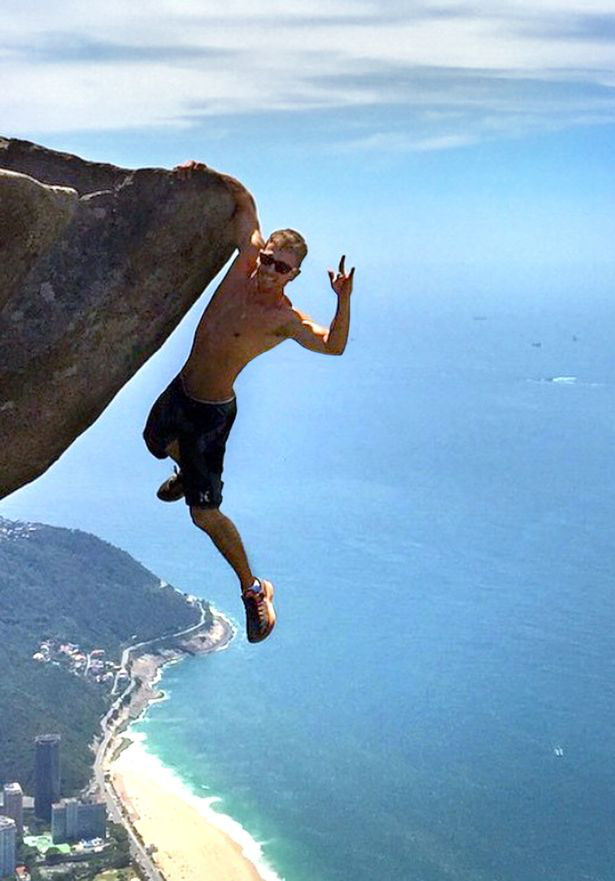

In [31]:
real_image_path = "D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\pic47.jpg"#'/kaggle/input/casia-dataset/casia/CASIA2/Au/Au_ani_00001.jpg'
Image.open(real_image_path)

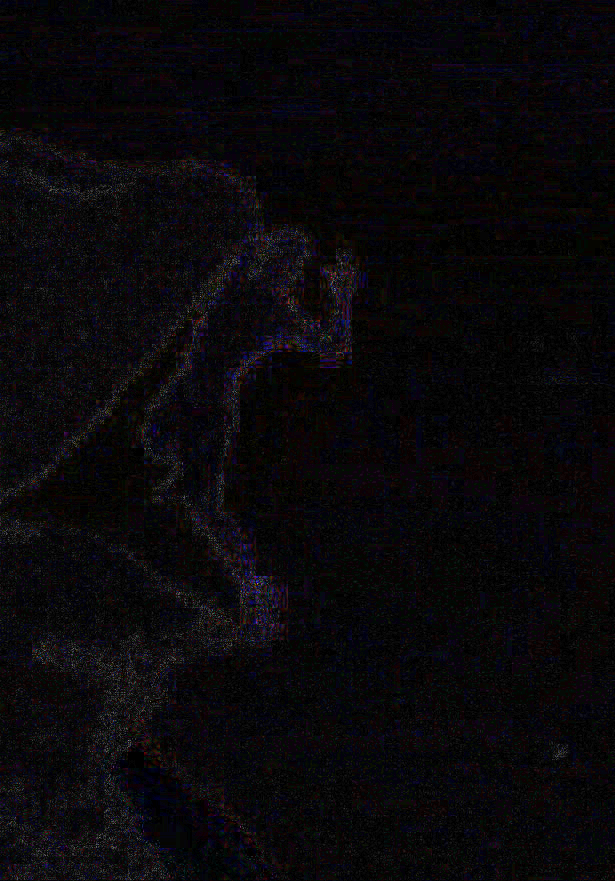

In [34]:
convert_to_ela_image(real_image_path, 65)

In [3]:
def load_it(path,num,real=1):
    X2=[]
    Y2=[]
    co=0
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('jpg') or filename.endswith('png'):
                if co==num:break
                co=co+1
                full_path = os.path.join(dirname, filename)
                im_g=prepare_image(full_path)
                X2.append(im_g)
                Y2.append(real)
                if len(Y2) % 500 == 0:
                    print(f'Processing {len(Y2)} images')
    return X2,Y2
                

In [9]:
import cv2
size=200
image_size = (size, size)
def prepare_image(image_path):
    tmp=np.array(convert_to_ela_image(image_path, 65).resize(image_size))  ##75 -->Acc=80 !!,,, 70-->77% balanced,
    im_gray=cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)
    return im_gray.flatten() / 255.0
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real
#######################################load real  ############################
path = r'D:\Data_images\real3'
X2,Y2=load_it(path,num=7000,real=1)
X=X+X2#random.sample(X2,3000)
Y=Y+Y2#random.sample(Y2,3000)

path = r'D:\Data_images\Data_from_many_sites\val\original'
X2,Y2=load_it(path,num=0,real=1)
X=X+X2
Y=Y+Y2


path = r'D:\Data_images\Data_from_many_sites\archive\CASIA2\Au'
X2,Y2=load_it(path,num=0,real=1)
X=X+X2
Y=Y+Y2

path = r'D:\Data_images\Data_from_many_sites\cameras_real'
X2,Y2=load_it(path,num=0,real=1)
X=X+X2
Y=Y+Y2

path = r'D:\Data_images\Data_from_many_sites\data2\4cam_auth\4cam_auth'
X2,Y2=load_it(path,num=0,real=1)
X=X+X2
Y=Y+Y2
#######################################load fake  ############################
path =  r'D:\Data_images\fake3' 
X2,Y2=load_it(path,num=6000,real=0)
X=X+X2#random.sample(X2,2500)
Y=Y+Y2#random.sample(Y2,2500)

path =  r'D:\Data_images\Data_from_many_sites\val\modified' 
X2,Y2=load_it(path,num=0,real=0)
X=X+X2
Y=Y+Y2

path =  r'D:\Data_images\Data_from_many_sites\archive\CASIA2\Tp' 
X2,Y2=load_it(path,num=0,real=0)
X=X+X2
Y=Y+Y2


path =  r'D:\Data_images\Data_from_many_sites\fake_mahm'  #_aug' 
X2,Y2=load_it(path,num=5000,real=0)
X=X+X2
Y=Y+Y2

path =  r'D:\Data_images\Data_from_many_sites\fake_mahm_aug' 
X2,Y2=load_it(path,num=0,real=0)
X=X+X2
Y=Y+Y2

path =  r'D:\Data_images\Data_from_many_sites\data2\4cam_splc\4cam_splc' 
X2,Y2=load_it(path,num=0,real=0)
X=X+X2
Y=Y+Y2

path =  r'D:\Data_images\Modification' 
X2,Y2=load_it(path,num=0,real=0)
X=X+X2
Y=Y+Y2


print(len(Y),len(X))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
13369 13369


In [ ]:
"""
good for suspecise
90
data fake2 5k,real2 5k, casia 500, all split_mahm
exclude real, fake <60
###################################
Best 81%
2500 fake2
500 fake_mahm
3000 real2

32
32

3 epoch

149/149 [==============================] - 481s 3s/step - loss: 0.4883 - accuracy: 0.7850 - val_loss: 0.4838 - val_accuracy: 0.7841
"""

In [5]:
"""
import cv2
size=200
image_size = (size, size)
def prepare_image(image_path):
    tmp=np.array(convert_to_ela_image(image_path, 65).resize(image_size))  ##75 -->Acc=80 !!,,, 70-->77% balanced,
    im_gray=cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)                           ## 90 2epoch real less than 60 suspected fak2,real2
    return im_gray.flatten() / 255.0
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

import random
#path = r'D:\Baaz\Misbar\General Images\Data\archive\CASIA2\Au'
#path = r'D:\Data_images\Data_from_many_sites\archive\CASIA2\Au'
path = r'D:\Data_images\real2'

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            im_g=prepare_image(full_path)
            X.append(im_g)
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
#X = X[:3100]
#Y = Y[:3100]
print(len(X), len(Y))
"""

"\nimport cv2\nsize=200\nimage_size = (size, size)\ndef prepare_image(image_path):\n    tmp=np.array(convert_to_ela_image(image_path, 65).resize(image_size))  ##75 -->Acc=80 !!,,, 70-->77% balanced,\n    im_gray=cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)                           ## 90 2epoch real less than 60 suspected fak2,real2\n    return im_gray.flatten() / 255.0\nX = [] # ELA converted images\nY = [] # 0 for fake, 1 for real\n\nimport random\n#path = r'D:\\Baaz\\Misbar\\General Images\\Data\x07rchive\\CASIA2\\Au'\n#path = r'D:\\Data_images\\Data_from_many_sites\x07rchive\\CASIA2\\Au'\npath = r'D:\\Data_images\real2'\n\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        if filename.endswith('jpg') or filename.endswith('png'):\n            full_path = os.path.join(dirname, filename)\n            im_g=prepare_image(full_path)\n            X.append(im_g)\n            Y.append(1)\n            if len(Y) % 500 == 0:\n                print(f'Processing {len(Y)

In [6]:
"""
#path =  r'D:\Baaz\Misbar\General Images\Data\archive\CASIA2\Tp/' 
#path = r'D:\Data_images\Data_from_many_sites\archive\CASIA2\Tp/'

path =  r'D:\Data_images\fake2/' 
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))
"""

"\n#path =  r'D:\\Baaz\\Misbar\\General Images\\Data\x07rchive\\CASIA2\\Tp/' \n#path = r'D:\\Data_images\\Data_from_many_sites\x07rchive\\CASIA2\\Tp/'\n\npath =  r'D:\\Data_images\x0cake2/' \nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        if filename.endswith('jpg') or filename.endswith('png'):\n            full_path = os.path.join(dirname, filename)\n            X.append(prepare_image(full_path))\n            Y.append(0)\n            if len(Y) % 500 == 0:\n                print(f'Processing {len(Y)} images')\n\nprint(len(X), len(Y))\n"

In [10]:

import gc

X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, size, size, 1)#3


In [11]:

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2 )#,random_state=5


#del X, Y, X2,Y2
#gc.collect()
#X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

10695 10695
2674 2674


In [12]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (size, size,1)))

    #model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu'))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu'))

    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation = 'softmax'))
    return model

model = build_model()
model.summary()


real_folder=r'D:\Data_images\golden_data\real2/'
#real_folder= r"D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\original/"
real_image=os.listdir(real_folder)


class_names = ['fake', 'real']
dep=1
im_list1=[]
im_list2=[]
for file_name in real_image:
    #print(file_name)
    if True: #file_name.endswith('jpg') or filename.endswith('PNG') or filename.endswith('jpeg') or filename.endswith('JPG'):
        #print(file_name)
        real_image_path = os.path.join(real_folder, file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, size, size, dep)
        im_list1.append(image)


  

fake_folder=r'D:\Data_images\golden_data\fake2/'
real_image = os.listdir(fake_folder)
#real_image = os.listdir(r'D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\fake/')

for file_name in real_image:
    #print(file_name)
    if True: #file_name.endswith('jpg') or filename.endswith('PNG') or filename.endswith('jpeg') or filename.endswith('JPG'):
        #print(file_name)
        real_image_path = os.path.join(fake_folder, file_name)
        image = prepare_image(real_image_path)
        #print(image.shape)
        #image=image[:300,:300,:]
        image = image.reshape(-1, size, size, dep)
        im_list2.append(image)



for i in range(50):
  epochs =1
  batch_size = 32
  init_lr = 1e-4
  #if i>=5:init_lr = 1e-5
  #if i>=5:init_lr = 1e-8
  #if i>=6:init_lr = 1e-9
  optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  early_stopping = EarlyStopping(monitor = 'val_acc',
                                min_delta = 0,
                                patience = 2,
                                verbose = 0,
                                mode = 'auto')

  hist = model.fit(X_train,
                  Y_train,
                  batch_size = batch_size,
                  epochs = epochs,
                  validation_data = (X_val, Y_val))#,callbacks = [early_stopping])


  correct_r = 0
  total_r = 0 
  for xx in im_list1:
    y_pred = model.predict(xx)
    y_pred_class = np.argmax(y_pred, axis = 1)[0]
    total_r += 1
    #if(y_pred_class==1):print("######################",end="")
    #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
    if y_pred_class == 1:
        correct_r += 1
        #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
  correct_w = 0
  total_w = 0
  for yy in im_list2:
    y_pred = model.predict(yy)
    y_pred_class = np.argmax(y_pred, axis = 1)[0]
    total_w += 1
    #if(y_pred_class==1):print("#################",end="")
    #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
    if y_pred_class == 0:
        correct_w += 1
        #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

  print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
  print(f'Total: {total_w}, Correct: {correct_w}, Acc: {correct_w / total_w * 100.0}')
  acc2=(correct_r+correct_w)/(total_r+total_w)
  print("Golden Dataset Accuracy",acc2)
  if acc2>.72:model.save('s3m200_'+str(acc2)+'.h5')
  if acc2>.79:break


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 192, 192, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 96, 96, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 96, 96, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               75497728  
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

KeyboardInterrupt: 

In [168]:
X_train[0].shape

(200, 200, 1)

In [127]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (size, size, 1)))
    model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = 'valid', activation = 'relu'))
    #model.add(Conv2D(filters = 16, kernel_size = (5, 5), padding = 'valid', activation = 'relu'))

    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(156, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation = 'softmax'))
    return model

model = build_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 196, 196, 8)       208       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 192, 192, 8)       1608      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 96, 96, 8)         0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 96, 96, 8)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 156)               11501724  
_________________________________________________________________
dropout_46 (Dropout)         (None, 156)             

In [140]:
epochs =1
batch_size = 32
init_lr = 1e-5

optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                 validation_data = (X_val, Y_val))#,callbacks = [early_stopping])

231/231 [==============================] - 211s 910ms/step - loss: 0.5776 - accuracy: 0.7242 - val_loss: 0.5615 - val_accuracy: 0.7258


In [118]:
model.save('ss200_96.h5')



In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

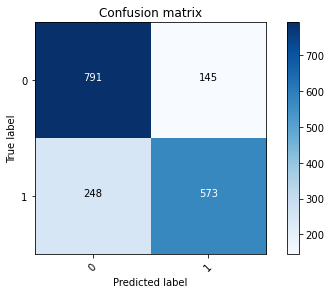

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [26]:
class_names = ['fake', 'real']
dep=1

Class: fake Confidence: 93.44


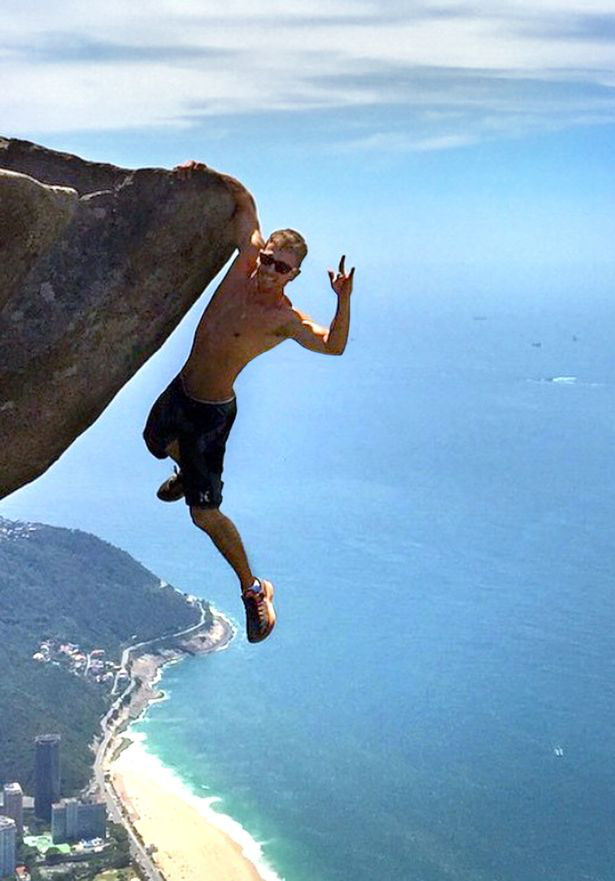

In [17]:
real_image_path = "D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\pic47.jpg"
 
image = prepare_image(real_image_path)
image = image.reshape(-1, size, size, dep) #3
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
Image.open(real_image_path)

Class: fake Confidence: 95.32


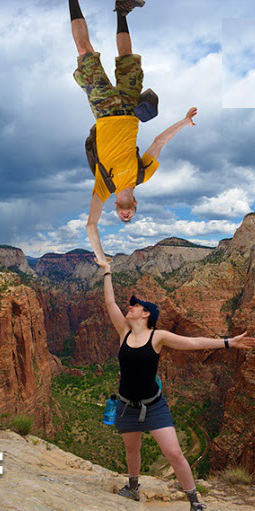

In [16]:
real_image_path = "D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\pic159.jpg"
image = prepare_image(real_image_path)
image = image.reshape(-1, size, size, dep)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
Image.open(real_image_path)

In [3]:

from keras.models import load_model
model = load_model(r'C:\Users\DELL\ss200_96.h5')  #n200_0.73    ss200_96  ss200_96.h5
def prepare_image(image_path):
    tmp=np.array(convert_to_ela_image(image_path, 75).resize(image_size))   
    tmp=cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)
    return tmp.flatten() / 255.0

In [4]:
 
model2 = load_model(r'C:\Users\DELL\n200_0.73.h5')  #n200_0.73  
def prepare_image2(image_path):
    tmp=np.array(convert_to_ela_image(image_path, 65).resize(image_size))  ##75 -->Acc=80 !!,,, 70-->77% balanced,
    tmp=cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)
    return tmp.flatten() / 255.0

In [5]:
size=200
image_size = (size, size)
real_folder=r'D:\Data_images\golden_data\real4/'
#real_folder= r"D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\original/"
real_image=os.listdir(real_folder)

thr=.65
correct_r = 0
total_r = 0
class_names = ['fake', 'real']
dep=1
tt=0
#rr=0
for file_name in real_image:
    #print(file_name)
    if True: #file_name.endswith('jpg') or filename.endswith('PNG') or filename.endswith('jpeg') or filename.endswith('JPG'):
        print(file_name)
        real_image_path = os.path.join(real_folder, file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, size, size, dep)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        con=np.amax(y_pred)
        if(y_pred_class==0):# or y_pred_class==1):
            if con<thr:
                tt=tt+1
                image = prepare_image2(real_image_path)
                image = image.reshape(-1, size, size, dep)
                y_pred = model2.predict(image)
                y_pred_class = np.argmax(y_pred, axis = 1)[0]
        if(y_pred_class==1):print("######################",end="")
        print(f'Class: {class_names[y_pred_class]} Confidence: {con * 100:0.2f}')
        if y_pred_class == 1:
            correct_r += 1
        #if(y_pred_class==1):
        #    if np.amax(y_pred)<.55:
        #        rr=rr+1
            #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
print(tt)
#print(rr)

IMG_3707.JPG
Class: fake Confidence: 79.41
IMG_3708.JPG
Class: fake Confidence: 77.78
real1.JPG
######################Class: real Confidence: 65.43
0


In [6]:
#fake_folder=r"D:\Data_images\Fake photos by mahmoud/"
#fake_folder= r"D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\forged/"

fake_folder=r'D:\Data_images\golden_data\fake3/'  
fake_folder=r'D:\Data_images\merge/'  #merge orginal_face copy_move_400  Face_swap_400 modify_400  Snapchat_162 splice_photos snapchat_148 Snapchat_125  Face_app
#fake_folder=r'D:\Data_images\Data_from_many_sites\val\modified' #modified  original  Gan3
real_image = os.listdir(fake_folder)
#real_image = os.listdir(r'D:\Baaz\Misbar\General Images\ManTraNet-master\ManTraNet-master\fake/')
correct_w = 0
total_w = 0
tt=0
#rr=0
for file_name in real_image:
    print(file_name)
    if True: #file_name.endswith('jpg') or filename.endswith('PNG') or filename.endswith('jpeg') or filename.endswith('JPG'):
        #print(file_name)
        real_image_path = os.path.join(fake_folder, file_name)
        image = prepare_image(real_image_path)
        #print(image.shape)
        #image=image[:300,:300,:]
        image = image.reshape(-1, size, size, dep)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_w += 1
        con=np.amax(y_pred)
        if(y_pred_class==0):# or y_pred_class==1):
            if con<thr:
                tt=tt+1
                image = prepare_image2(real_image_path)
                image = image.reshape(-1, size, size, dep)
                y_pred = model2.predict(image)
                y_pred_class = np.argmax(y_pred, axis = 1)[0]
                #y_pred_class =1
                
        if(y_pred_class==1):print("#################",end="")
        #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
        print(f'Class: {class_names[y_pred_class]} Confidence: {con * 100:0.2f}')
        if y_pred_class == 0:
            correct_w += 1
            if np.amax(y_pred)<.65:tt=tt+1
            #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
        #if(y_pred_class==1):
        #    if np.amax(y_pred)<.55:
        #        rr=rr+1

print()
print("##########################################################################################")
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total_w}, Correct: {correct_w}, Acc: {correct_w / total_w * 100.0}')
print("Golden Dataset Accuracy:",(correct_r+correct_w)/(total_r+total_w))
print(tt)
#print(rr)

1.jpg
Class: fake Confidence: 79.68
10.jpg
Class: fake Confidence: 66.24
100.jpg
#################Class: real Confidence: 50.67
101.jpg
Class: fake Confidence: 82.97
102.jpg
Class: fake Confidence: 92.43
103.jpg
Class: fake Confidence: 90.68
104.jpg
Class: fake Confidence: 87.14
105.jpg
#################Class: real Confidence: 71.05
106.jpg
Class: fake Confidence: 90.71
107.jpg
Class: fake Confidence: 89.27
108.jpg
Class: fake Confidence: 85.79
109.jpg
Class: fake Confidence: 66.97
11.jpg
#################Class: real Confidence: 50.28
110.jpg
Class: fake Confidence: 83.91
111.jpg
Class: fake Confidence: 88.43
112.jpg
Class: fake Confidence: 81.76
113.jpg
Class: fake Confidence: 84.33
114.jpg
#################Class: real Confidence: 53.16
115.jpg
Class: fake Confidence: 79.81
116.jpg
#################Class: real Confidence: 55.33
117.jpg
Class: fake Confidence: 67.88
118.jpg
Class: fake Confidence: 87.79
119.jpg
Class: fake Confidence: 85.74
12.jpg
Class: fake Confidence: 84.29
120.jpg


Class: fake Confidence: 63.20
287.jpg
Class: fake Confidence: 82.50
288.jpg
Class: fake Confidence: 50.78
289.jpg
Class: fake Confidence: 88.82
29.jpg
Class: fake Confidence: 74.50
290.jpg
Class: fake Confidence: 84.89
291.jpg
Class: fake Confidence: 97.37
292.jpg
Class: fake Confidence: 83.46
293.jpg
Class: fake Confidence: 81.04
294.jpg
Class: fake Confidence: 84.30
295.jpg
Class: fake Confidence: 85.38
296.jpg
#################Class: real Confidence: 56.97
297.jpg
Class: fake Confidence: 87.99
298.jpg
Class: fake Confidence: 82.57
299.jpg
Class: fake Confidence: 71.36
3.jpg
Class: fake Confidence: 82.81
30.jpg
Class: fake Confidence: 70.40
300.jpg
Class: fake Confidence: 86.99
301.jpg
Class: fake Confidence: 79.58
302.jpg
Class: fake Confidence: 88.03
303.jpg
Class: fake Confidence: 73.02
304.jpg
Class: fake Confidence: 66.16
305.jpg
Class: fake Confidence: 86.17
306.jpg
Class: fake Confidence: 69.27
307.jpg
Class: fake Confidence: 80.43
308.jpg
Class: fake Confidence: 79.24
309.jpg